In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
input_path="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Users\\FinalCsvFiles\\Users_2017_2020.csv"

In [2]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [3]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    
    result = adfuller(timeseries)
    p_value=result[1]
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

In [4]:
import scipy.stats as stats
def is_normal_shapiro(data):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [5]:
from scipy.stats import f_oneway

#call data frame
#group1 dataframe1
#group2 dataframe2
#group3 dataframe 3
#you can call as many dataframes as you like 
# f_oneway(group1, group2, group3)

In [6]:
data=pd.read_csv(input_path,names=["AccId","CreateDate","LastAccessDate","ViewsNum","UpVotes","DownVotes"])
data.head()
# commits_2019,commits_2020=preprocess_monthly_commit(data)
# plot_monthly_commit(commits_2019,commits_2020,"Clojure")

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes
0,9883458,2017-01-01T00:00:56.717,2020-11-28T01:11:55.853,2,0,0
1,9947518,2017-01-01T00:01:12.400,2020-10-11T15:09:34.260,0,0,0
2,9947524,2017-01-01T00:04:35.913,2018-06-08T20:13:35.803,1,0,0
3,9947525,2017-01-01T00:06:08.170,2019-07-12T16:35:43.657,0,0,0
4,9947527,2017-01-01T00:09:40.727,2017-01-06T01:26:02.110,0,0,0


In [7]:
len(data)

7126703

In [8]:
data["CreateDate"] = pd.to_datetime(data["CreateDate"])
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0


In [55]:
data['day_date'] = data['CreateDate'].dt.date

In [56]:
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear,CreateMonth,CreateYearMonth,day_date
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0,2017,1,2017-01-01,2017-01-01
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0,2017,1,2017-01-01,2017-01-01
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017,1,2017-01-01,2017-01-01
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017,1,2017-01-01,2017-01-01
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017,1,2017-01-01,2017-01-01


In [57]:
creation_daily=pd.DataFrame(data[["AccId", "day_date"]])
creation_daily.head()

,AccId,day_date
0,9883458,2017-01-01
1,9947518,2017-01-01
2,9947524,2017-01-01
3,9947525,2017-01-01
4,9947527,2017-01-01


In [58]:
creation_daily_grp=creation_daily.groupby(by=['day_date']).size().reset_index(name='counts')
creation_daily_grp.head()

,day_date,counts
0,2017-01-01,1970
1,2017-01-02,3318
2,2017-01-03,4364
3,2017-01-04,4821
4,2017-01-05,4891


In [176]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

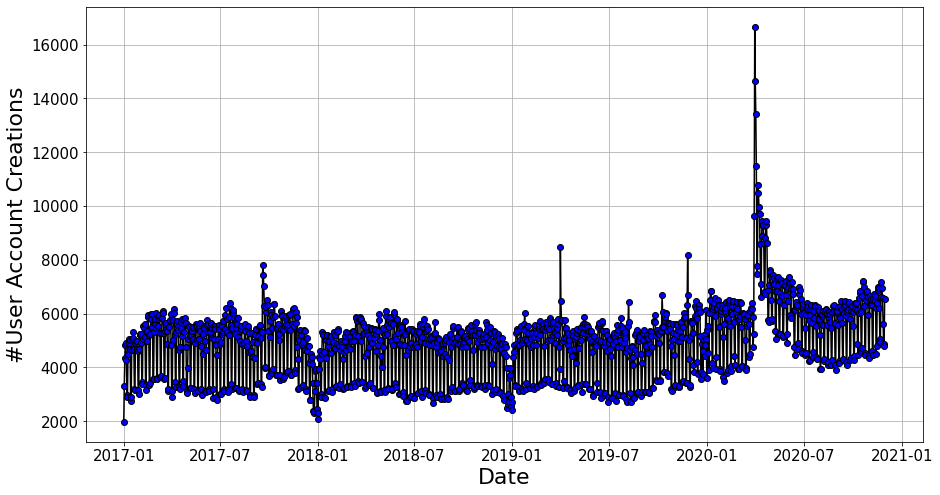

In [186]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(creation_daily_grp['day_date'],creation_daily_grp['counts'],'-o',color='black',markerfacecolor='b')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('#User Account Creations',fontsize=22)
plt.xlabel('Date',fontsize=22)
plt.grid()


In [63]:
kpss_test(creation_daily_grp['counts'])

KPSS Statistic: 2.0326310332667092
p-value: 0.01
num lags: 24
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [64]:
adf_test(creation_daily_grp['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -3.498969
p-value: 0.008014
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: The series is stationary


In [65]:
creation_daily_grp['count_delta'] = creation_daily_grp['counts'].diff()
creation_daily_grp.head()

,day_date,counts,count_delta
0,2017-01-01,1970,NaN
1,2017-01-02,3318,1348.0
2,2017-01-03,4364,1046.0
3,2017-01-04,4821,457.0
4,2017-01-05,4891,70.0


In [112]:
creation_daily_grp_delta_notna = creation_daily_grp[creation_daily_grp['count_delta'].notna()]
len(creation_daily_grp_delta_notna)

1429

In [72]:
len(creation_daily_grp)

1430

In [76]:
creation_daily_grp_delta_notna.head()

,day_date,counts,count_delta
1,2017-01-02,3318,1348.0
2,2017-01-03,4364,1046.0
3,2017-01-04,4821,457.0
4,2017-01-05,4891,70.0
5,2017-01-06,4281,-610.0


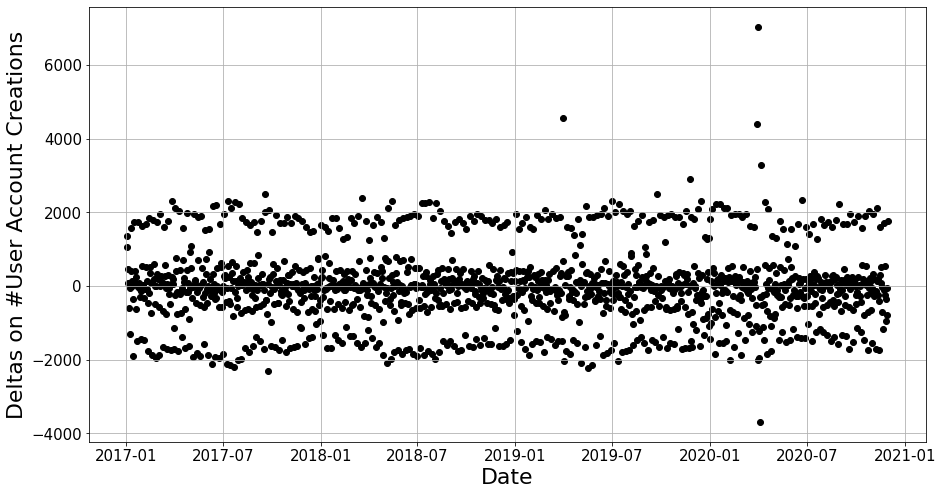

In [187]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(creation_daily_grp_delta_notna['day_date'],creation_daily_grp_delta_notna['count_delta'],color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Deltas on #User Account Creations',fontsize=22)
plt.xlabel('Date',fontsize=22)
plt.grid()
plt.savefig('figs/SO_UsersCreationDailyDelta.pdf',bbox_inches='tight')


In [188]:
creation_daily_grp_delta_notna[creation_daily_grp_delta_notna['count_delta']>6000]

,day_date,counts,count_delta
1185,2020-03-31,16669,7040.0


In [74]:
is_normal_shapiro(creation_daily_grp_delta_notna['count_delta'])

Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)


In [78]:
creation_daily_grp_delta_notna['day_date']=pd.to_datetime(creation_daily_grp_delta_notna["day_date"])
creation_daily_grp_delta_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 1 to 1429
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day_date     1429 non-null   datetime64[ns]
 1   counts       1429 non-null   int64         
 2   count_delta  1429 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 44.7 KB


<ipython-input-78-e6560584eb25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creation_daily_grp_delta_notna['day_date']=pd.to_datetime(creation_daily_grp_delta_notna["day_date"])


In [80]:
creation_daily_grp_delta_notna_17_19=creation_daily_grp_delta_notna[creation_daily_grp_delta_notna['day_date']<'2020-01-01']
len(creation_daily_grp_delta_notna_17_19)

1094

In [81]:
creation_daily_grp_delta_notna_17_19.head()

,day_date,counts,count_delta
1,2017-01-02,3318,1348.0
2,2017-01-03,4364,1046.0
3,2017-01-04,4821,457.0
4,2017-01-05,4891,70.0
5,2017-01-06,4281,-610.0


In [82]:
creation_daily_grp_delta_notna_20=creation_daily_grp_delta_notna[creation_daily_grp_delta_notna['day_date']>='2020-01-01']
len(creation_daily_grp_delta_notna_20)

335

In [89]:
creation_daily_grp_delta_notna_20[creation_daily_grp_delta_notna_20['count_delta']>=4000]

,day_date,counts,count_delta
1184,2020-03-30,9629,4392.0
1185,2020-03-31,16669,7040.0


In [95]:
creation_daily_grp_delta_notna_17_19[creation_daily_grp_delta_notna_17_19['count_delta']>=4000]

,day_date,counts,count_delta
820,2019-04-01,8486,4550.0


In [93]:
creation_daily_grp_delta_notna_20[creation_daily_grp_delta_notna_20['count_delta']<-2000]

,day_date,counts,count_delta
1133,2020-02-08,3779,-2013.0
1186,2020-04-01,14661,-2008.0
1189,2020-04-04,7788,-3696.0


In [103]:
def do_meanwhit(df1,df2):
    stat, p = stats.mannwhitneyu(df1['count_delta'], df2['count_delta'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [104]:
do_meanwhit(creation_daily_grp_delta_notna_17_19,creation_daily_grp_delta_notna_20)

Statistics=179148.500, p=0.268
Same distribution (fail to reject H0)


In [191]:
creation_daily_grp_delta_notna_17_19['count_delta'].mean()

2.807129798903108

In [192]:
creation_daily_grp_delta_notna_20['count_delta'].mean()

4.486567164179104

In [100]:
creation_daily_grp_delta_notna_17=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2017-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2018-01-01')]
len(creation_daily_grp_delta_notna_17) ##does not have fisrt day, we filtered it

364

In [101]:
creation_daily_grp_delta_notna_18=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2018-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2019-01-01')]
len(creation_daily_grp_delta_notna_18)

365

In [102]:
creation_daily_grp_delta_notna_19=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2019-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2020-01-01')]
len(creation_daily_grp_delta_notna_19)

365

In [105]:
do_meanwhit(creation_daily_grp_delta_notna_17,creation_daily_grp_delta_notna_20)

Statistics=59039.000, p=0.235
Same distribution (fail to reject H0)


In [106]:
do_meanwhit(creation_daily_grp_delta_notna_18,creation_daily_grp_delta_notna_20)

Statistics=59660.000, p=0.290
Same distribution (fail to reject H0)


In [107]:
do_meanwhit(creation_daily_grp_delta_notna_19,creation_daily_grp_delta_notna_20)

Statistics=60449.500, p=0.398
Same distribution (fail to reject H0)


In [9]:
data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)

In [10]:
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0,2017
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0,2017
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017


In [11]:
data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)


In [12]:
data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear,CreateMonth,CreateYearMonth
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0,2017,1,2017-1
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0,2017,1,2017-1
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017,1,2017-1
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017,1,2017-1
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017,1,2017-1


In [13]:
data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])

In [14]:
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear,CreateMonth,CreateYearMonth
0,9883458,2017-01-01 00:00:56.717,2020-11-28T01:11:55.853,2,0,0,2017,1,2017-01-01
1,9947518,2017-01-01 00:01:12.400,2020-10-11T15:09:34.260,0,0,0,2017,1,2017-01-01
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017,1,2017-01-01
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017,1,2017-01-01
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017,1,2017-01-01


In [15]:
creation_yearly_monthly = pd.DataFrame(data[["AccId", "CreateYearMonth"]])

In [16]:
creation_yearly_monthly.head()

,AccId,CreateYearMonth
0,9883458,2017-01-01
1,9947518,2017-01-01
2,9947524,2017-01-01
3,9947525,2017-01-01
4,9947527,2017-01-01


In [17]:
yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
yearly_monthly_grp.head()

,CreateYearMonth,counts
0,2017-01-01,130696
1,2017-02-01,136260
2,2017-03-01,156821
3,2017-04-01,141237
4,2017-05-01,145311


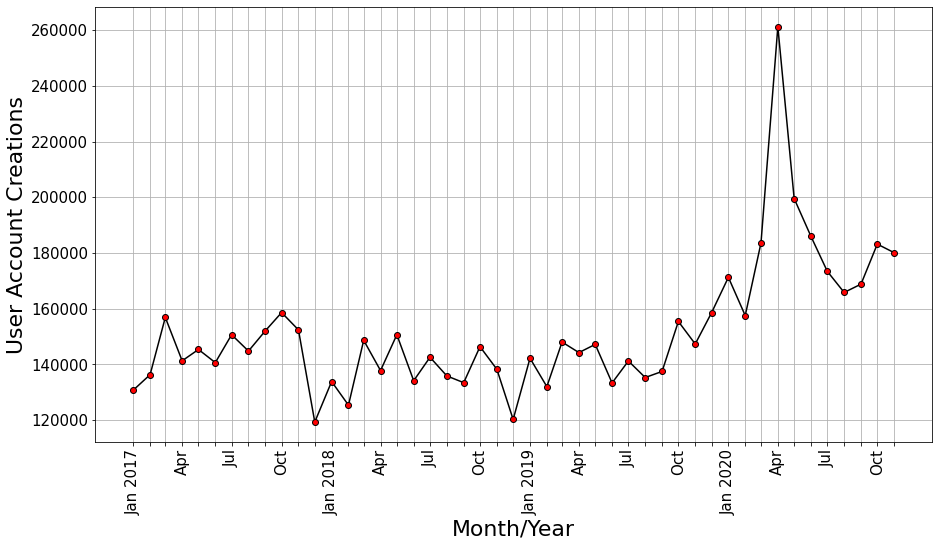

In [19]:
# yearly_monthly_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_grp['CreateYearMonth'],yearly_monthly_grp['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_grp['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('User Account Creations',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
plt.savefig('figs/SO_UsersCreationYearltMonthly.pdf',bbox_inches='tight')


# plt.xlabel('Month/Year')
# plt.ylabel('Account Creations')

In [146]:
def fit_reg_line(df,ticks,date_column,count_column,filename):
    x = np.arange(df[date_column].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
    fit = np.polyfit(x, df[count_column], 1)
    fit_fn = np.poly1d(fit)
    fig, ax = plt.subplots(figsize=(15,8))
    plt.plot(df[date_column], fit_fn(x), 'k-')
    plt.scatter(df[date_column],df[count_column],color='red')
    plt.xticks(df[date_column], ticks,fontsize=15,rotation=90)
    plt.grid()
    print(len(filename))
    if(len(filename)>0):
        plt.savefig(filename,bbox_inches='tight')
    plt.show()
    return fit_fn

0


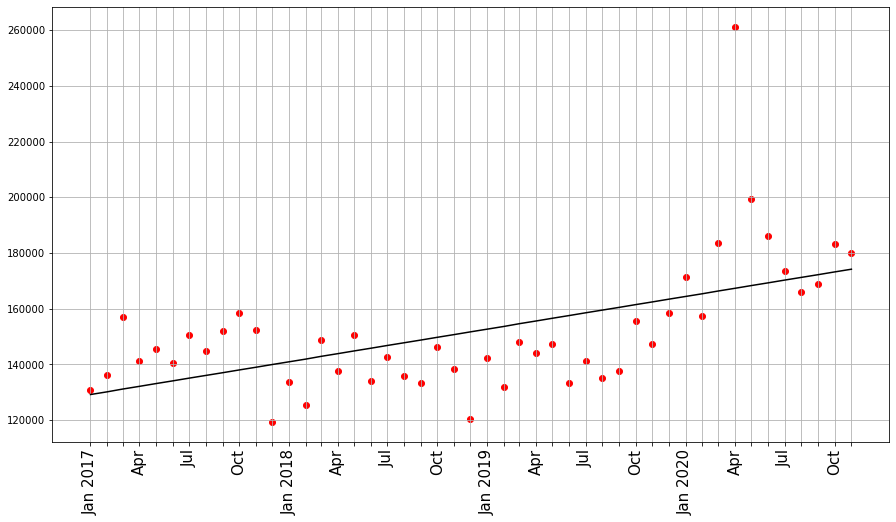

poly1d([   978.40356152, 129128.69680851])

In [147]:
fit_reg_line(yearly_monthly_grp,months_xticks,'CreateYearMonth','counts','')

In [20]:
# x = np.arange(yearly_monthly_grp['CreateYearMonth'].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
# fit = np.polyfit(x, yearly_monthly_grp['counts'], 1)
# fit_fn = np.poly1d(fit)

In [50]:
# fig, ax = plt.subplots(figsize=(15,8))
# plt.plot(yearly_monthly_grp['CreateYearMonth'], fit_fn(x), 'k-')
# plt.scatter(yearly_monthly_grp['CreateYearMonth'],yearly_monthly_grp['counts'])

In [54]:
is_normal_shapiro(yearly_monthly_grp['counts'])

Statistics=0.811, p=0.000
Sample does not look Gaussian (reject H0)


In [52]:
#df should be monthly yearly data
def to_bimonthly(df):
    d={'counts':'sum'}
    bi_counts=df.groupby(df.index  // 2).agg(d)
    monthYear=df['CreateYearMonth']
#     monthYear['months']=monthYear[::2]
    bi_months = pd.DataFrame({"months":monthYear[::2]}) 
    bi_months.index = np.arange(1, len(bi_months) + 1)
    bi_counts.index=np.arange(1, len(bi_counts) + 1)
    result = pd.concat([bi_months, bi_counts], axis=1)
    result.drop(result.tail(1).index,inplace=True) # drop last row cause we do not have dec data and so it only includes nov and becomes small
    return result

In [53]:
bimonthly_yearly=to_bimonthly(yearly_monthly_grp)
bimonthly_yearly

,months,counts
1,2017-01-01,266956
2,2017-03-01,298058
3,2017-05-01,285900
4,2017-07-01,295348
5,2017-09-01,310575
6,2017-11-01,271584
7,2018-01-01,259098
8,2018-03-01,286330
9,2018-05-01,284699
10,2018-07-01,278322


In [24]:
yearly_monthly_grp

,CreateYearMonth,counts
0,2017-01-01,130696
1,2017-02-01,136260
2,2017-03-01,156821
3,2017-04-01,141237
4,2017-05-01,145311
5,2017-06-01,140589
6,2017-07-01,150608
7,2017-08-01,144740
8,2017-09-01,152006
9,2017-10-01,158569


In [28]:
len(bimonthly_yearly)

23

In [25]:
#remove nov/dec 2020 cause we do not have dec data
bi_ticks=['Jan/Feb 2017','March/April 2017','May/June 2017','July/Aug 2017','Sept/Oct 2017','Nov/Dec 2017','Jan/Feb 2018','March/April 2018','May/June 2018','July/Aug 2018','Sept/Oct 2018','Nov/Dec 2018',
    'Jan/Feb 2019','March/April 2019','May/June 2019','July/Aug 2019','Sept/Oct 2019','Nov/Dec 2019','Jan/Feb 2020','March/April 2020','May/June 2020','July/Aug 2020','Sept/Oct 2020']

In [26]:
len(bi_ticks)

23

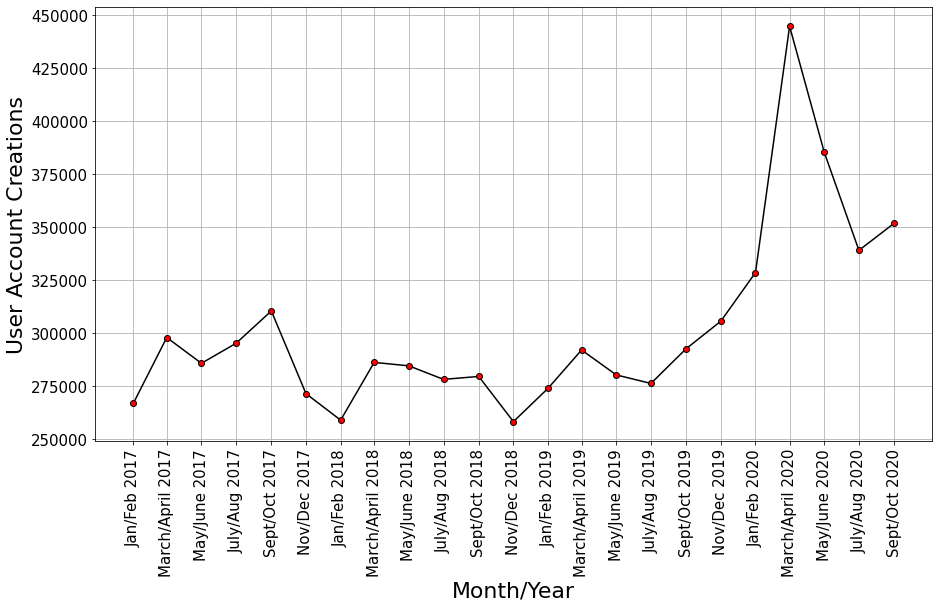

In [193]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly['months'],bimonthly_yearly['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('User Account Creations',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
plt.savefig('figs/SO_UsersCreationBiMonthly.pdf',bbox_inches='tight')


In [30]:
# def fit_reg_line(df,ticks,column):
#     x = np.arange(df['months'].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
#     fit = np.polyfit(x, df[column], 1)
#     fit_fn = np.poly1d(fit)

#     fig, ax = plt.subplots(figsize=(15,8))
#     plt.plot(df['months'], fit_fn(x), 'k-')
#     plt.scatter(df['months'],df[column])
#     plt.xticks(df['months'], ticks,fontsize=15,rotation=90)
#     plt.show()

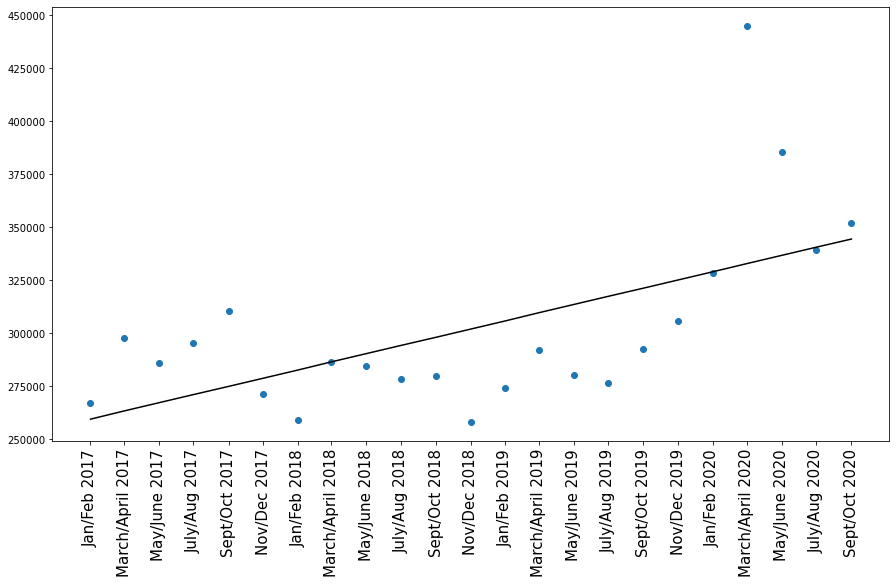

In [51]:
fit_reg_line(bimonthly_yearly,bi_ticks,'months','counts')

In [32]:
kpss_test(bimonthly_yearly['counts'])

KPSS Statistic: 0.31574181605845886
p-value: 0.1
num lags: 9
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [33]:
adf_test(bimonthly_yearly['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -1.825392
p-value: 0.367930
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
Result: The series is not stationary


# Deltas

In [34]:
bimonthly_yearly['count_delta'] = bimonthly_yearly['counts'].diff()
bimonthly_yearly
#users['delta'] = df.currentPrice.diff().shift(-1)


,months,counts,count_delta
1,2017-01-01,266956,NaN
2,2017-03-01,298058,31102.0
3,2017-05-01,285900,-12158.0
4,2017-07-01,295348,9448.0
5,2017-09-01,310575,15227.0
6,2017-11-01,271584,-38991.0
7,2018-01-01,259098,-12486.0
8,2018-03-01,286330,27232.0
9,2018-05-01,284699,-1631.0
10,2018-07-01,278322,-6377.0


In [115]:
bimonthly_yearly[18:]

,months,counts
19,2020-01-01,328701
20,2020-03-01,444811
21,2020-05-01,385420
22,2020-07-01,339164
23,2020-09-01,351925


In [35]:
bimonthly_yearly_deltaclean=bimonthly_yearly.tail(22)
# bimonthly_yearly_deltaclean=bimonthly_yearly_deltaclean.reset_index()
bimonthly_yearly_deltaclean

,months,counts,count_delta
2,2017-03-01,298058,31102.0
3,2017-05-01,285900,-12158.0
4,2017-07-01,295348,9448.0
5,2017-09-01,310575,15227.0
6,2017-11-01,271584,-38991.0
7,2018-01-01,259098,-12486.0
8,2018-03-01,286330,27232.0
9,2018-05-01,284699,-1631.0
10,2018-07-01,278322,-6377.0
11,2018-09-01,279702,1380.0


In [151]:
len(bimonthly_yearly_deltaclean)

22

In [119]:
do_meanwhit(bimonthly_yearly_deltaclean[:17],bimonthly_yearly_deltaclean[17:])

Statistics=42.000, p=0.500
Same distribution (fail to reject H0)


In [117]:
bimonthly_yearly_deltaclean[:17]

,months,counts,count_delta
2,2017-03-01,298058,31102.0
3,2017-05-01,285900,-12158.0
4,2017-07-01,295348,9448.0
5,2017-09-01,310575,15227.0
6,2017-11-01,271584,-38991.0
7,2018-01-01,259098,-12486.0
8,2018-03-01,286330,27232.0
9,2018-05-01,284699,-1631.0
10,2018-07-01,278322,-6377.0
11,2018-09-01,279702,1380.0


In [36]:
bi_ticks[1:]

['March/April 2017',
 'May/June 2017',
 'July/Aug 2017',
 'Sept/Oct 2017',
 'Nov/Dec 2017',
 'Jan/Feb 2018',
 'March/April 2018',
 'May/June 2018',
 'July/Aug 2018',
 'Sept/Oct 2018',
 'Nov/Dec 2018',
 'Jan/Feb 2019',
 'March/April 2019',
 'May/June 2019',
 'July/Aug 2019',
 'Sept/Oct 2019',
 'Nov/Dec 2019',
 'Jan/Feb 2020',
 'March/April 2020',
 'May/June 2020',
 'July/Aug 2020',
 'Sept/Oct 2020']

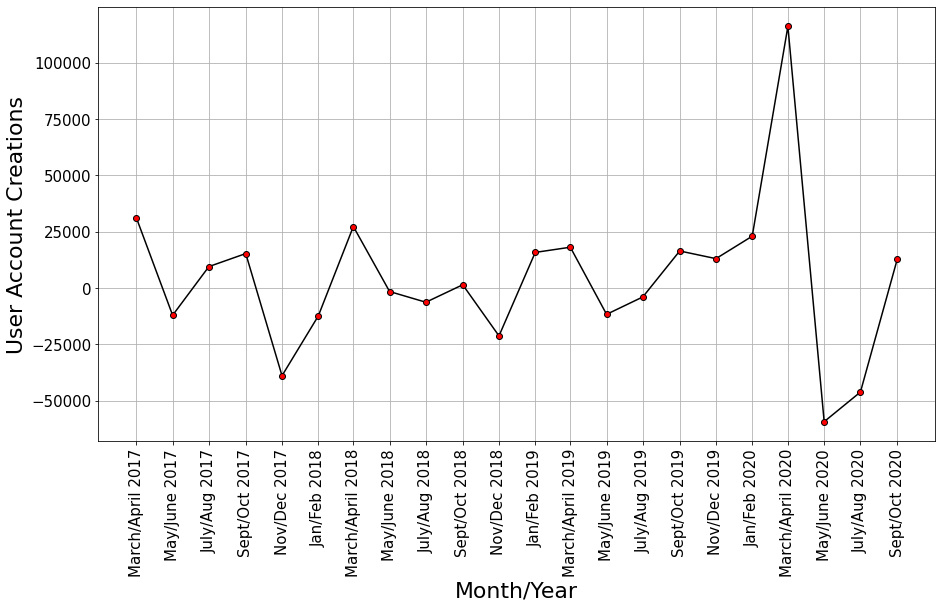

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_deltaclean['months'],bimonthly_yearly_deltaclean['count_delta'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('User Account Creations',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

51


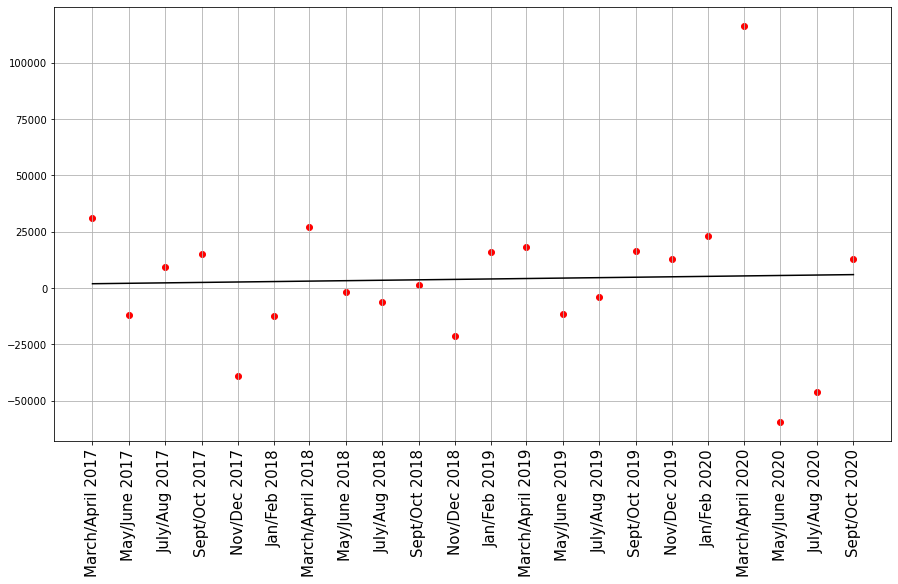

In [148]:
# fitline=fit_reg_line(bimonthly_yearly_deltaclean,bi_ticks[1:],'months','count_delta',
#              'figs/SO_UsersCreationBiMonthlyDeltasRegressline.pdf')


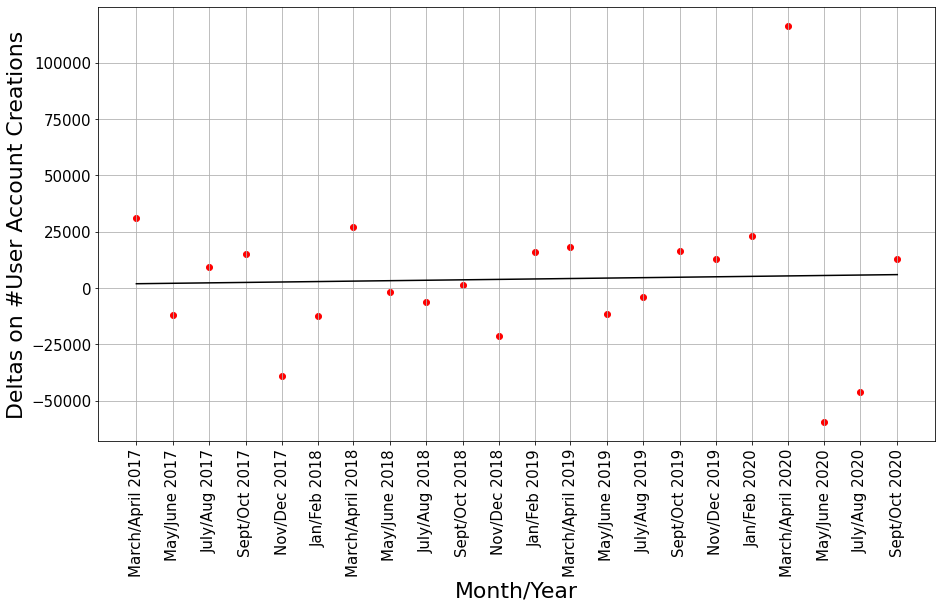

In [190]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_yearly_deltaclean['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_yearly_deltaclean['count_delta'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_deltaclean['months'], predictions, 'k-')
plt.scatter(bimonthly_yearly_deltaclean['months'],bimonthly_yearly_deltaclean['count_delta'],color='red')
plt.xticks(bimonthly_yearly_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Deltas on #User Account Creations',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
plt.savefig('figs/SO_UsersCreationBiMonthlyDeltasRegressline.pdf',bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(20,10))
# ax.plot(x, predictions,label='Linear fit', lw=3,color='black')
# # plt.xticks(x, bi_ticks[1:23],fontsize=18,rotation=90)
# ax.scatter(x, y,label='value', marker='o', color='r')
# # plt.xticks(bimonthly_yearly_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
# plt.ylabel('Number of user creations')
# ax.legend()
# plt.grid()
# plt.show()

In [ ]:
# x = np.arange(df[date_column].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
# fit = np.polyfit(x, df[count_column], 1)
# fit_fn = np.poly1d(fit)
# fig, ax = plt.subplots(figsize=(15,8))
# plt.plot(df[date_column], fit_fn(x), 'k-')
# plt.scatter(df[date_column],df[count_column],color='red')
# plt.xticks(df[date_column], ticks,fontsize=15,rotation=90)
# plt.grid()
# print(len(filename))
# if(len(filename)>0):
#     plt.savefig(filename,bbox_inches='tight')
# plt.show()


In [162]:
len(predictions)

22

In [170]:
bimonthly_yearly_deltaclean['diff_line']=(predictions-bimonthly_yearly_deltaclean['count_delta']).abs()
bimonthly_yearly_deltaclean

<ipython-input-170-a528b2685ce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bimonthly_yearly_deltaclean['diff_line']=(predictions-bimonthly_yearly_deltaclean['count_delta']).abs()


,months,counts,count_delta,diff_line
2,2017-03-01,298058,31102.0,29261.517787
3,2017-05-01,285900,-12158.0,14191.029362
4,2017-07-01,295348,9448.0,7222.423490
5,2017-09-01,310575,15227.0,12808.876341
6,2017-11-01,271584,-38991.0,41601.670807
7,2018-01-01,259098,-12486.0,15289.217956
8,2018-03-01,286330,27232.0,24236.234896
9,2018-05-01,284699,-1631.0,4819.312253
10,2018-07-01,278322,-6377.0,9757.859401
11,2018-09-01,279702,1380.0,2193.406550


In [168]:
bimonthly_yearly_deltaclean['diff_line'].max()

110803.6691134952

In [ ]:
# x = np.arange(bimonthly_yearly_deltaclean['months'].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
# fit = np.polyfit(x, bimonthly_yearly_deltaclean['count_delta'], 1)
# fit_fn = np.poly1d(fit)

# fig, ax = plt.subplots(figsize=(15,8))
# plt.plot(bimonthly_yearly_deltaclean['months'], fit_fn(x), 'k-')
# plt.scatter(bimonthly_yearly_deltaclean['months'],bimonthly_yearly_deltaclean['count_delta'])
# plt.xticks(bimonthly_yearly_deltaclean['months'], bi_ticks[1:23],fontsize=15,rotation=90)
# plt.show()

In [ ]:
# from sklearn import linear_model
# x=np.array(pd.to_datetime(bimonthly_yearly_deltaclean['months'].index.values, format='%Y-%m-%d'), dtype=float)
# x=x.reshape(-1, 1)
# y=np.array(bimonthly_yearly_deltaclean['count_delta'], dtype=float)

# lm = linear_model.LinearRegression()
# model = lm.fit(x,y)
# predictions = lm.predict(x)
# fig, ax = plt.subplots(figsize=(20,10))
# ax.plot(x, predictions,label='Linear fit', lw=3)
# # plt.xticks(x, bi_ticks[1:23],fontsize=18,rotation=90)
# ax.scatter(x, y,label='value', marker='o', color='r')
# plt.ylabel('Number of user creations')
# ax.legend()
# plt.show()

In [39]:
kpss_test(bimonthly_yearly_deltaclean['count_delta'])

KPSS Statistic: 0.19702702472429348
p-value: 0.1
num lags: 9
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [40]:
adf_test(bimonthly_yearly_deltaclean['count_delta'])

Results of Dickey-Fuller Test:
ADF Statistic: -4.969592
p-value: 0.000025
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646
Result: The series is stationary


In [171]:
bimonthly_yearly_deltaclean['count_delta'].mean()

3862.2272727272725

In [172]:
bimonthly_yearly_deltaclean['count_delta'].std()

34522.3004640021

In [43]:
is_normal_shapiro(bimonthly_yearly_deltaclean['count_delta'])

Statistics=0.872, p=0.009
Sample does not look Gaussian (reject H0)


In [47]:
stats.normaltest(bimonthly_yearly_deltaclean['count_delta']) #p_value<0.05, not normal

NormaltestResult(statistic=13.819964408428858, pvalue=0.0009977755525261013)

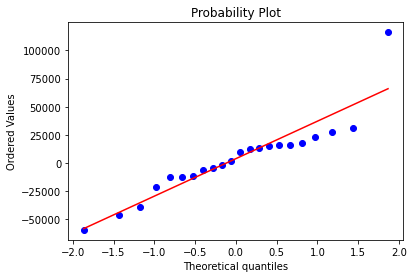

In [46]:
import pylab 
stats.probplot(bimonthly_yearly_deltaclean['count_delta'], dist="norm", plot=pylab)
pylab.show()

(array([2., 1., 4., 5., 8., 1., 0., 0., 0., 1.]),
 array([-59391. , -41840.9, -24290.8,  -6740.7,  10809.4,  28359.5,
         45909.6,  63459.7,  81009.8,  98559.9, 116110. ]),
 <BarContainer object of 10 artists>)

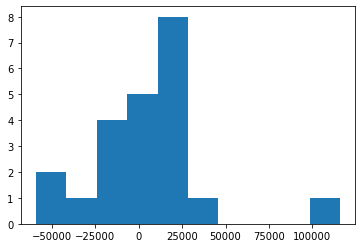

In [44]:
plt.hist(bimonthly_yearly_deltaclean['count_delta'])

# Stats tests

In [ ]:
# yearly_monthly_grp_17=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2017-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2018-01-01')]
# np.var(yearly_monthly_grp_17['counts'])

In [ ]:
# yearly_monthly_grp_18=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2018-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2019-01-01')]
# np.var(yearly_monthly_grp_18['counts'])

In [ ]:
# yearly_monthly_grp_19=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2019-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2020-01-01')]
# np.var(yearly_monthly_grp_19['counts'])

In [ ]:
# yearly_monthly_grp_20=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2020-01-01')]
# np.var(yearly_monthly_grp_20['counts'])

In [ ]:
# print(yearly_monthly_grp_20.head())
# print((yearly_monthly_grp_20['CreateYearMonth']).min())
# print((yearly_monthly_grp_20['CreateYearMonth']).max())
# print(len(yearly_monthly_grp_20['CreateYearMonth']))

In [ ]:
# kpss_test(bimonthly_yearly_deltaclean['count_delta'])

In [ ]:
# adf_test(bimonthly_yearly_deltaclean['count_delta'])

In [ ]:
# kpss_test(bimonthly_yearly_['count_delta'].head(46))

In [ ]:
# adf_test(bimonthly_yearly['count_delta'].head(46))

In [ ]:
#noraml test
# print(len(yearly_monthly_grp))
# import scipy.stats as stats
# stats.normaltest(yearly_monthly_grp["counts"])

In [ ]:
is_normal_shapiro(yearly_monthly_grp['counts'])

In [ ]:
# stat, p = stats.wilcoxon(yearly_monthly_grp_no_dec_17['counts'], yearly_monthly_grp_no_dec_20['counts'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

In [ ]:
# stat, p = stats.wilcoxon(yearly_monthly_grp_no_dec_18['counts'], yearly_monthly_grp_no_dec_20['counts'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

In [ ]:
# stat, p = stats.wilcoxon(yearly_monthly_grp_no_dec_19['counts'], yearly_monthly_grp_no_dec_20['counts'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

In [ ]:
# stat, p = stats.wilcoxon(yearly_monthly_grp_no_dec_17['counts'], yearly_monthly_grp_no_dec_18['counts'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

In [ ]:
# stat, p = stats.wilcoxon(yearly_monthly_grp_no_dec_17['counts'], yearly_monthly_grp_no_dec_19['counts'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

In [ ]:
# stat, p = stats.wilcoxon(yearly_monthly_grp_no_dec_18['counts'], yearly_monthly_grp_no_dec_19['counts'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

In [ ]:
# stat, p = stats.mannwhitneyu(yearly_monthly_grp_17_19['counts'], yearly_monthly_grp_20['counts'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

In [ ]:
# np.var(yearly_monthly_grp_17_19['counts'])

In [ ]:
# np.var(yearly_monthly_grp_20['counts'])

In [ ]:
#anova test:
# f_oneway(yearly_monthly_grp_17_19['counts'], yearly_monthly_grp_20['counts'])

In [ ]:
#kpss
# kpss_test(yearly_monthly_grp_17_19['counts'])
# kpss_test(yearly_monthly_grp_20['counts'])

In [ ]:
# adf_test(yearly_monthly_grp_17_19['counts'])
# adf_test(yearly_monthly_grp_20['counts'])

In [ ]:
# np.var(yearly_monthly_grp_20['counts'])

In [ ]:
# yearly_monthly_grp_18=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2018-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2019-01-01')]
# np.var(yearly_monthly_grp_18['counts'])

In [ ]:
# yearly_monthly_grp_19=yearly_monthly_grp[(yearly_monthly_grp['CreateYearMonth']>='2019-01-01') & (yearly_monthly_grp['CreateYearMonth']<'2020-01-01')]
# np.var(yearly_monthly_grp_19['counts'])

In [ ]:
# kpss_test(yearly_monthly_grp_17['counts'])
# kpss_test(yearly_monthly_grp_18['counts'])
# kpss_test(yearly_monthly_grp_19['counts'])
# kpss_test(yearly_monthly_grp_20['counts'])

In [ ]:
# adf_test(yearly_monthly_grp_17['counts'])
# adf_test(yearly_monthly_grp_18['counts'])
# adf_test(yearly_monthly_grp_19['counts'])
# adf_test(yearly_monthly_grp_20['counts'])

# data stats to put in paper:

In [ ]:
data.head()

In [ ]:
max(data["CreateYear"])

In [ ]:
data_2017=data[data["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

In [ ]:
data_2018=data[data["CreateYear"]==2018]
len(data_2018)

In [ ]:
data_2019=data[data["CreateYear"]==2019]
len(data_2019)

In [ ]:
data_2020=data[data["CreateYear"]==2020]
len(data_2020)